In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import row, column, gridplot, layout
from bokeh.models import Slider


output_notebook()

Loading BokehJS ...

In [2]:
# B to liczba kontaktów osoby zainfekowanej 
# G mowi o tym jak szybko ludzie zdrowieja 
B = 0.8
G = 0.2
# w zyciu chcemy zeby B/G było jak najmniejsze
#jak jest wieksze niz 1 to epidemia sie bedzie rozwijac
def func(y, t):
    S, I, R = y
    return -B * S * I, B * S * I - G * I, G * I
# S to osoby podatne na chorobe
# I to osoby zainfekowane
# R to osoby zdrowe i odporne na chorobe

In [3]:
#poczatek pandemii. 
S0 = 0.99
I0 = 0.01
R0 = 0

ts = np.linspace(0, 50, 1000)
res = odeint(func, (S0,I0,R0), ts)

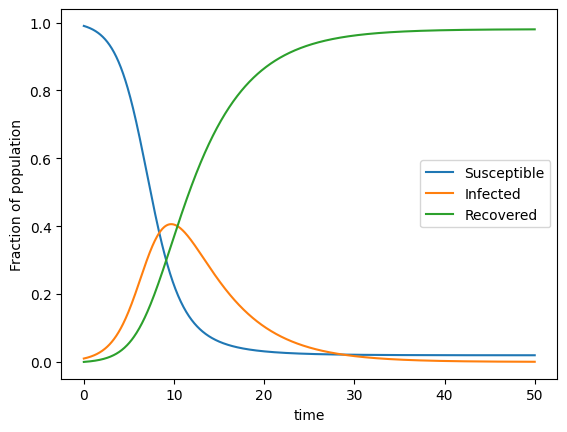

In [4]:
plt.plot(ts, res[:,0], label = 'Susceptible')
plt.plot(ts, res[:,1], label = 'Infected')
plt.plot(ts, res[:,2], label = 'Recovered')
plt.legend(loc="center right")
plt.xlabel('time')
plt.ylabel('Fraction of population')
plt.show()

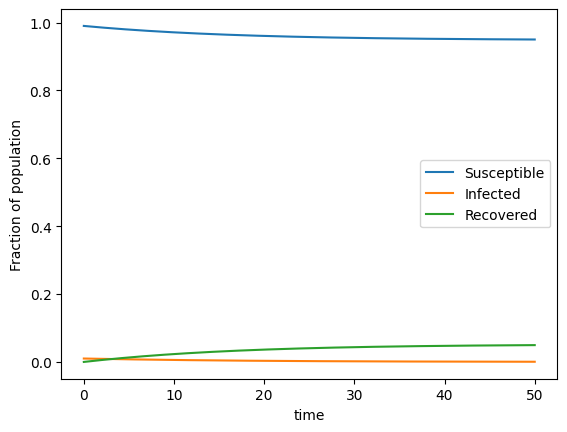

In [5]:
B = 0.25
G = 0.3
ts = np.linspace(0, 50, 1000)
res1 = odeint(func, (S0,I0,R0), ts)
plt.plot(ts, res1[:,0], label = 'Susceptible')
plt.plot(ts, res1[:,1], label = 'Infected')
plt.plot(ts, res1[:,2], label = 'Recovered')
plt.legend(loc="center right")
plt.xlabel('time')
plt.ylabel('Fraction of population')
plt.show()

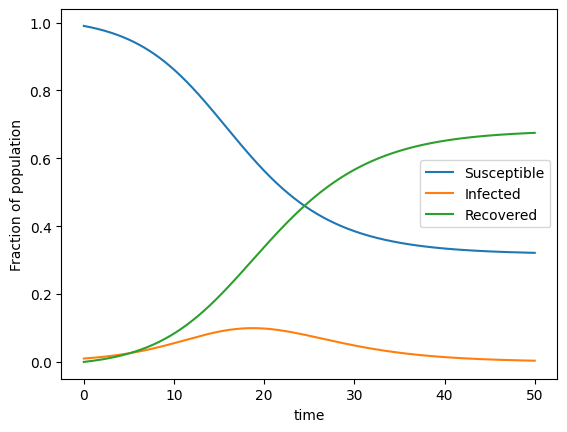

In [6]:
B = 0.5
G = 0.3
ts = np.linspace(0, 50, 1000)

res2 = odeint(func, (S0,I0,R0), ts)
plt.plot(ts, res2[:,0], label = 'Susceptible')
plt.plot(ts, res2[:,1], label = 'Infected')
plt.plot(ts, res2[:,2], label = 'Recovered')
plt.legend(loc="center right")
plt.xlabel('time')
plt.ylabel('Fraction of population')
plt.show()

In [27]:
fig = figure(x_axis_label = 't',
             y_axis_label = 'Fraction of population',
             width = 500,
             aspect_ratio = 1)
fig.toolbar.logo = None
fig.toolbar.autohide = True
fig.grid.grid_line_dash = (5, 5)
fig.line(ts, res[:,0], color = 'blue', line_width = 3, legend_label = 'Susceptible')
fig.line(ts, res[:,1], color = 'red', line_width = 3, legend_label = 'Infected')
fig.line(ts, res[:,2], color = 'green', line_width = 3, legend_label = 'Recovered')
s1 = Slider(start = 0, end = 1, step = 0.01, value = 0.8, title = 'B', sizing_mode = 'stretch_width')
s2 = Slider(start = 0, end = 1, step = 0.01, value = 0.1, title = 'G', sizing_mode = 'stretch_width')
show(row(column(s1, s2, width = 200), fig))


auto
